In [14]:
import pandas as pd
dataset = pd.read_csv("Data_for_UCI_named.csv")
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


Just validating that we have no nulls and the dataset is complete. The target column is the only non-numeric feature (stabf). As it is a boolean (stable or unstable) will convert it to a separate dataframe convert it to binary, while we normalize the rest of the data.

In [16]:
target_frame = dataset["stabf"]
target_frame.head()

0    unstable
1      stable
2    unstable
3    unstable
4    unstable
Name: stabf, dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
fstab_label_encoder = LabelEncoder()
fstab_label_encoder.fit(target_frame)
encoded_values = fstab_label_encoder.transform(target_frame)
encoded_target = pd.DataFrame(encoded_values, columns=["target"])
encoded_target.head()

,target
0,1
1,0
2,1
3,1
4,1


In [18]:
from sklearn.preprocessing import StandardScaler
dataset.drop(columns="stabf", axis=1, inplace=True)
standardScaler = StandardScaler()
standardScaler.fit(dataset)
scaled_dataset = pd.DataFrame(standardScaler.transform(dataset), columns= dataset.columns.values)
scaled_dataset.head()



,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,-0.835374,-0.791317,1.141704,1.652103,0.017397,1.079405,-0.017078,-1.092545,0.457467,1.220013,1.321628,1.579026,1.073120
1,1.478297,-0.126705,-0.803111,-1.415043,1.752124,-1.593619,-1.438158,-0.011575,-0.406791,1.230354,0.135424,0.936256,-0.587487
2,1.357093,1.312140,-0.803499,-1.471504,-0.458492,0.098253,-0.062840,0.760963,-1.319852,0.881299,1.146596,-1.513802,-0.332095
3,-1.653138,0.882289,-0.278354,-1.060901,0.284250,0.513904,-1.591046,0.583414,-0.287304,1.647250,1.474543,-0.591750,0.355922
4,-0.771543,0.860108,-0.111670,1.680114,-0.298075,0.287450,-1.376343,1.606636,0.992226,-0.253610,0.481133,1.079063,0.924487


In [19]:
scaled_dataset["target"] = encoded_target
scaled_dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,target
0,-0.835374,-0.791317,1.141704,1.652103,0.017397,1.079405,-0.017078,-1.092545,0.457467,1.220013,1.321628,1.579026,1.073120,1
1,1.478297,-0.126705,-0.803111,-1.415043,1.752124,-1.593619,-1.438158,-0.011575,-0.406791,1.230354,0.135424,0.936256,-0.587487,0
2,1.357093,1.312140,-0.803499,-1.471504,-0.458492,0.098253,-0.062840,0.760963,-1.319852,0.881299,1.146596,-1.513802,-0.332095,1
3,-1.653138,0.882289,-0.278354,-1.060901,0.284250,0.513904,-1.591046,0.583414,-0.287304,1.647250,1.474543,-0.591750,0.355922,1
4,-0.771543,0.860108,-0.111670,1.680114,-0.298075,0.287450,-1.376343,1.606636,0.992226,-0.253610,0.481133,1.079063,0.924487,1


# 1) Download Electrical Grid Stability Simulated Data  datasets and print the dimension of the dataset.  Apply PCA on the dataset and select first three components except "stabf" (target). Print the dimension of modified dataset and visualise the data using appropriate plotting tool/s. 

In [20]:
print("Dimentions for this dataset:",scaled_dataset.shape)

Dimentions for this dataset: (10000, 14)


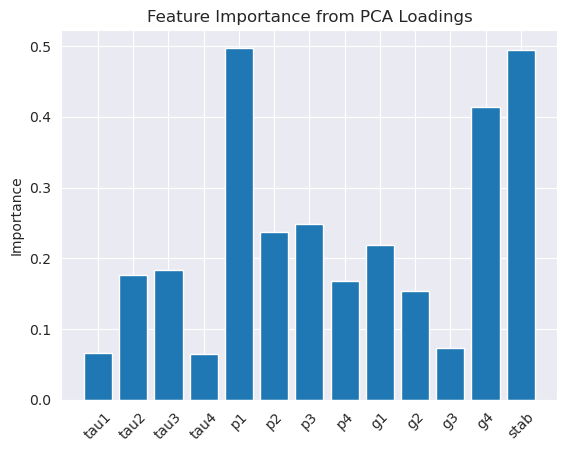

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca=PCA(n_components=3)
features = scaled_dataset.drop('target',axis=1)
target =  scaled_dataset['target']

principal_components = pca.fit_transform(features)
# Compute squared loadings
loadings_squared = pca.components_ ** 2
feature_importance = loadings_squared.sum(axis=0)
# Plot importance
plt.bar(features.columns, feature_importance)
plt.ylabel('Importance')
plt.title('Feature Importance from PCA Loadings')
plt.xticks(rotation=45)
plt.show()

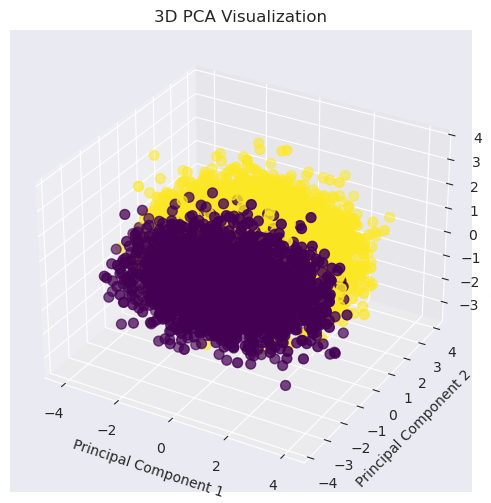

In [22]:
# Convert the principal components into a dataframe
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Color based on target variable for better visualization
ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], c=target, cmap="viridis", s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization')

plt.show()

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
#Generating a 80/20 training set
X_train, X_test, y_train, y_test = train_test_split ( principal_components, encoded_target, test_size=0.2 )


classifier = SVC(kernel="poly").fit(X_train,y_train.values.ravel())



In [38]:
#Reusable method for generating the results:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

def print_model_metrics(true_labels, predicted_labels):
    # Calculate metrics for classification problems
    acc = accuracy_score(true_labels, predicted_labels)
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    prec = precision_score(true_labels, predicted_labels, average='macro') # for multiclass problems. Use 'binary' for binary problems
    f1 = f1_score(true_labels, predicted_labels, average='macro')  # for multiclass problems. Use 'binary' for binary problems
    
    # Print metrics
    print("Accuracy:", acc)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nPrecision:", prec)
    print("\nF1 Score:", f1)

In [39]:
predicted = classifier.predict(X_test)
print_model_metrics(y_test, predicted)

Accuracy: 0.909

Confusion Matrix:
 [[ 568  151]
 [  31 1250]]

Precision: 0.9202334607167073

F1 Score: 0.8970260908727774


# 2) Classify the "Electrical Grid Stability Simulated Data"  (target=stabf) available in the dataset using SVM with poly kernel.  Select appropriate data splitting approach and performance metrics.  Report the performances and the used model hyper-parameters.  

The model correctly predicted the classes 90.9% of the time.
When the model predicts a sample to be positive the answer is correct about 92.02% of the time.
The F1 Score is 89.70%. 
Confusion Matrix:
True Positives: 1250
True Negatives: 568
False Positives: 151
False Negatives: 31
From the confusion matrix:

Used Model Hyper-parameters:

Kernel: Polynomial (kernel="poly")
Other hyperparameters: Default settings were used for other hyperparameters since they weren't explicitly set when during instantiation.

# 3)  Load Electrical Grid Stability Simulated Datadatasets and print the dimension of the dataset. Apply tSNE method to reduce dimension and select first three components. Plot the selected components using appropriate visualisation technique. 


Already done the first part for previous exercise.
Dimentions for this dataset: (10000, 14)


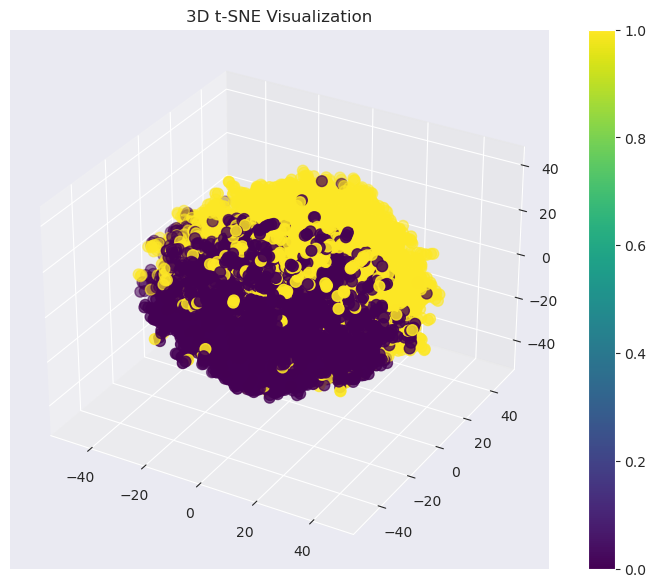

In [46]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
tsne = TSNE(n_components=3, random_state=13)
X_tsne = tsne.fit_transform(features)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=target, cmap='viridis', s=60)
plt.colorbar(sc)
ax.set_title('3D t-SNE Visualization')

# Show the plot
plt.show()

# 4.  Create a model for detecting "Electrical Grid Stability Simulated Data" using SVM with a rbf kernel.  Select appropriate data splitting approach and performance metrics.  Report the performances and the used model hyper-parameters. 

In [45]:
classifier_rbf = SVC(kernel="rbf").fit(X_train,y_train.values.ravel())
predicted_rbf = classifier_rbf.predict(X_test)
print_model_metrics(y_test, predicted_rbf)

Accuracy: 0.9245

Confusion Matrix:
 [[ 639   80]
 [  71 1210]]

Precision: 0.9189922480620155

F1 Score: 0.9177998447995745


# 5) Based on the model hyper-parameters used in task-2 and task-5, share your understanding of hyper-parameters tuning in ML model development.

We changed the kernel hyperparameter in our implmentation. Depending on the kind of data that we have, different hyperparameters will have better or worst results. In our case, we had a better overall accuracy with the rbf kernel hyperparameter, at the same time, we had a greater number of false negatives. Depending on the overall importance of the different analysed results, different hyperparameters should be applied to get the desired outcome.